# Clustering of breast cancer gene expression data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns; sns.set()
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics.cluster import adjusted_rand_score

### 1. Exploratory Data Analysis

The dataset GSE45827 was taken from kaggle (https://www.kaggle.com/brunogrisci/breast-cancer-gene-expression-cumida). It represents gene expression data from breast cancer samples curated by the Curated Microarray Database CuMiDa (http://sbcb.inf.ufrgs.br/cumida#). CuMiDa is a repository for machine learning that contains 78 handpicked cancer microarray datasets from 30.000 studies from the Gene Expression Omnibus (GEO), a public functional genomics data repository (https://www.ncbi.nlm.nih.gov/geo/).
The data is already in a pre-processed and normalized format ready to be used for experimental ML approaches.

In [3]:
# load dataset from disk and explore the first rows
df = pd.read_csv('Breast_GSE45827 2.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
# retrieve number of rows and columns in the dataset
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the breast cancer data set')

There are 151 rows and 54677 columns in the breast cancer data set


In [4]:
columns = df.keys()
columns = list(columns)
print(f"There are {len(columns)} columns {columns}")

There are 54677 columns ['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at', '1316_at', '1320_at', '1405_i_at', '1431_at', '1438_at', '1487_at', '1494_f_at', '1552256_a_at', '1552257_a_at', '1552258_at', '1552261_at', '1552263_at', '1552264_a_at', '1552266_at', '1552269_at', '1552271_at', '1552272_a_at', '1552274_at', '1552275_s_at', '1552276_a_at', '1552277_a_at', '1552278_a_at', '1552279_a_at', '1552280_at', '1552281_at', '1552283_s_at', '1552286_at', '1552287_s_at', '1552288_at', '1552289_a_at', '1552291_at', '1552293_at', '1552295_a_at', '1552296_at', '1552299_at', '1552301_a_at', '1552302_at', '1552303_a_at', '1552304_at', '1552306_at', '1552307_a_at', '1552309_a_at', '1552310_at', '1552311_a_at', '1552312_a_at', '1552314_a_at', '1552315_at', '1552316_a_at', '1552318_at', '1552319_a_at', '1552320_a_at', '1552321_a_at', '1552322_at', '1552323_s_at', '1552325_at', '1552326_a_at', '1552327_at', '1552329_at', '1552330_at', '1552332_at', '1552334_at',

In [5]:
# get column names
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54677)

In [6]:
# explore datatypes of columns
df.dtypes

samples                    int64
type                      object
1007_s_at                float64
1053_at                  float64
117_at                   float64
121_at                   float64
1255_g_at                float64
1294_at                  float64
1316_at                  float64
1320_at                  float64
1405_i_at                float64
1431_at                  float64
1438_at                  float64
1487_at                  float64
1494_f_at                float64
1552256_a_at             float64
1552257_a_at             float64
1552258_at               float64
1552261_at               float64
1552263_at               float64
1552264_a_at             float64
1552266_at               float64
1552269_at               float64
1552271_at               float64
1552272_a_at             float64
1552274_at               float64
1552275_s_at             float64
1552276_a_at             float64
1552277_a_at             float64
1552278_a_at             float64
          

In [7]:
# check for missing values in dataset
df.isnull().sum()

samples                  0
type                     0
1007_s_at                0
1053_at                  0
117_at                   0
121_at                   0
1255_g_at                0
1294_at                  0
1316_at                  0
1320_at                  0
1405_i_at                0
1431_at                  0
1438_at                  0
1487_at                  0
1494_f_at                0
1552256_a_at             0
1552257_a_at             0
1552258_at               0
1552261_at               0
1552263_at               0
1552264_a_at             0
1552266_at               0
1552269_at               0
1552271_at               0
1552272_a_at             0
1552274_at               0
1552275_s_at             0
1552276_a_at             0
1552277_a_at             0
1552278_a_at             0
                        ..
AFFX-PheX-3_at           0
AFFX-PheX-5_at           0
AFFX-PheX-M_at           0
AFFX-r2-Bs-dap-3_at      0
AFFX-r2-Bs-dap-5_at      0
AFFX-r2-Bs-dap-M_at      0
A

In [8]:
# compute descriptive statistics on columns
statistics=df.describe()

In [9]:
statistics.head()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095,7.787712,...,12.359605,11.823386,14.018193,13.773030,7.621929,5.699042,6.185605,2.918774,3.624008,3.173868
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550,1.648260,...,0.318436,0.369859,0.253870,0.290556,0.857777,0.860841,0.953867,0.093126,0.145394,0.101907
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065,3.866030,...,11.650564,10.939760,13.419083,13.191191,5.729767,4.326227,4.301471,2.733497,3.299401,2.937393
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260,6.804510,...,12.149550,11.592631,13.807282,13.523011,6.884862,4.967515,5.336542,2.861549,3.532740,3.109767


In [10]:
statistics_cropped = statistics[['samples', '1007_s_at', '1053_at']]
statistics_cropped

,samples,1007_s_at,1053_at
count,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910
std,45.431226,0.613445,0.706464
min,84.000000,7.505488,5.855968
25%,121.500000,10.103030,7.166075
50%,159.000000,10.416819,7.531673
75%,200.500000,10.735117,8.053832
max,238.000000,11.675109,9.627008


In [11]:
# check for unique ID identifiers
print(f"The total ids are {df['samples'].count()}, from those the unique ids are {df['samples'].value_counts().shape[0]} ")

The total ids are 151, from those the unique ids are 151 


In [12]:
# determine unique labels
df['type'].unique()

array(['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'],
      dtype=object)

In [13]:
# check for label distribution
label_count = df['type'].value_counts()
label_count

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

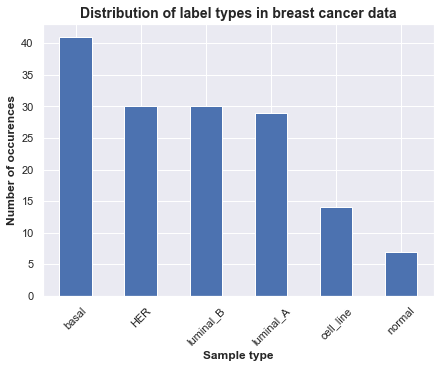

In [14]:
# visualize distribution of labels
fig = plt.figure(figsize=(7, 5))
df['type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Number of occurences', fontsize=12, fontweight='bold')
plt.xlabel('Sample type', fontsize=12, fontweight='bold')
plt.title('Distribution of label types in breast cancer data', fontsize=14, fontweight='bold')

# export graphic for report
plt.savefig("distribution_labels.png", bbox_inches = 'tight')

### 2. Data Preparation for Clustering

In [4]:
# assign labels to variable y
y = df['type']
y

0          basal
1          basal
2          basal
3          basal
4          basal
5          basal
6          basal
7          basal
8          basal
9          basal
10         basal
11         basal
12         basal
13         basal
14         basal
15         basal
16         basal
17         basal
18         basal
19         basal
20         basal
21         basal
22         basal
23         basal
24         basal
25         basal
26         basal
27         basal
28         basal
29         basal
         ...    
121    luminal_B
122    luminal_B
123    luminal_B
124    luminal_B
125    luminal_B
126    luminal_B
127    luminal_B
128    luminal_B
129    luminal_B
130    luminal_B
131    luminal_B
132    luminal_B
133    luminal_B
134    luminal_B
135    luminal_B
136    luminal_B
137    luminal_B
138    luminal_B
139    luminal_B
140    luminal_B
141    luminal_B
142    luminal_B
143    luminal_B
144    luminal_B
145    luminal_B
146    luminal_B
147    luminal_B
148    luminal

In [16]:
# select feature data for clustering
data = df.iloc[:,2:].values
data

array([[ 9.85003997,  8.09792735,  6.42472816, ...,  2.9666567 ,
         3.50849465,  3.30199869],
       [ 9.86135737,  8.21222225,  7.06259284, ...,  2.9347635 ,
         3.68766637,  3.06429903],
       [10.1034785 ,  8.93613685,  5.73596977, ...,  2.84768393,
         3.55059675,  3.15853522],
       ...,
       [11.02709803,  7.18087582,  6.30473602, ...,  3.0851274 ,
         3.62884807,  3.21580734],
       [10.44439499,  7.5251525 ,  5.9644598 , ...,  3.01852519,
         3.77059745,  3.10229782],
       [11.34581728,  7.3792993 ,  5.89117177, ...,  3.06158533,
         3.85752548,  3.12982746]])

Before applying clustering, we scale our data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features. Here we use the StandardScaler module for scaling the features individually. StandardScaler subtracts the mean from each feature and then scales to unit variance.

In [17]:
scaler = StandardScaler()

In [18]:
scaled_data = scaler.fit_transform(data)

In [19]:
scaled_data

array([[-0.79956253,  0.66184251,  0.31065541, ...,  0.51588188,
        -0.79712848,  1.26152126],
       [-0.78105222,  0.82416537,  1.30221516, ...,  0.17226811,
         0.43928775, -1.07876515],
       [-0.38504796,  1.85227675, -0.76001854, ..., -0.76591736,
        -0.50659316, -0.15095702],
       ...,
       [ 1.12558961, -0.64056402,  0.12412781, ...,  1.79227194,
         0.03339837,  0.41291911],
       [ 0.17254231, -0.15161854, -0.4048311 , ...,  1.07470717,
         1.01157301, -0.70464582],
       [ 1.64687488, -0.35876085, -0.51875725, ...,  1.53863231,
         1.61144015, -0.43360104]])

### 2. Clustering Approaches

### k-Means Clustering

Although the number of classes with 6 for the cancer subtypes is known for this dataset, perform a calculation and plotting of the cluster errors to see whether 6 is really the optimal size for k.

In [20]:
# Calculate the cluster errors for clusters from 1 to 15
cluster_range = range( 1, 20 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 10 )
  clusters.fit(scaled_data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,8.255925e+06
1,2,7.576451e+06
2,3,6.964663e+06
3,4,6.593340e+06
4,5,6.280975e+06
5,6,6.069671e+06
6,7,5.992941e+06
7,8,5.876305e+06
8,9,5.779673e+06
9,10,5.675790e+06


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all k values. That k at which the inertia stop to drop significantly (elbow method) will be the best k.

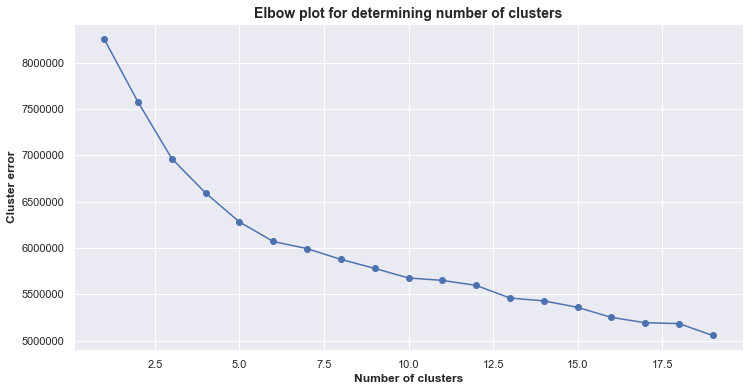

In [21]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cluster error', fontsize=12, fontweight='bold')
plt.title('Elbow plot for determining number of clusters', fontsize=14, fontweight='bold')
plt.savefig('elbowplot.png')

Perform initial clustering with 6 clusters using all features.

In [22]:
# instantiate KMeans object
km = KMeans(n_clusters=6, random_state=0)

In [23]:
# predict the cluster labels
labels = km.fit_predict(scaled_data)

In [24]:
km.cluster_centers_.shape

(6, 54675)

The clustering results in 6 clusters with 54675 dimensions.

In [25]:
centroids = km.cluster_centers_
print(centroids)

[[-0.08142151 -1.72800831 -0.90012456 ... -0.06695318 -0.33859952
   0.16319211]
 [-0.15435444  0.36000801  0.27036948 ... -0.39932329 -0.04811727
  -0.6563544 ]
 [ 0.46222779 -0.36959585  0.21218061 ...  0.12310059 -0.60602834
  -0.1243597 ]
 [ 0.50329949 -0.63741363  0.07375085 ...  0.01143034  0.13828449
   0.15549853]
 [-0.70990649  1.67091538 -1.45898252 ...  1.40508854  1.51294087
   0.90172788]
 [-0.64416546  0.40166558  0.34629908 ... -0.19881585 -0.55210872
   0.46357276]]


In [27]:
labels.size

151

In [28]:
# print cluster labels
print(labels)

[5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 3 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 0 2 0 0 0 0 0 3 3 3 3 2 3 2 2 3 3 3 3 3 3 3 3 2 2 3
 3 3 3 3 3 2 3 3 3 3 3 2 2 2 3 3 2 2 2 2 3 3 3 2 2 3 3 3 3 0 2 2 3 3 3 3 3
 3 3 3]


In [29]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(km.labels_ , columns = list(['label']))

df_labels['label'] = df_labels['label'].astype('category')

In [30]:
# Joining the label dataframe with the original data frame. 
df_labeled = df.join(df_labels)
df_labeled.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,label
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999,5
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299,5
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535,5
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665,5
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947,5


In [31]:
df_labeled['label'].value_counts()

3    46
1    44
5    22
2    18
4    14
0     7
Name: label, dtype: int64

### Evaluate k-means Clustering

There are several ways to evaluate a clustering. In the following the cluster error, the silhoutte plot and score as well as the accuracy are calculated. Since the data set already has labels assigned to it, it is possible to calculate the amount of correct cluster assignments

Calculatation of cluster error

In [32]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 6071500.25


Calculation of accuracy score. Since the k-means algorithm doesn´t have any knowledge on the true cluster labels, the permutations need to be found before comparing to the true labels.

In [33]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [34]:
permutation = find_permutation(6, y, km.labels_)
print(permutation)

['normal', 'basal', 'luminal_B', 'luminal_A', 'cell_line', 'HER']


In [37]:
new_labels = [ permutation[label] for label in km.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.6225165562913907


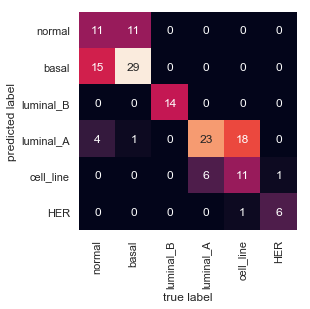

In [38]:
# plot confusion matrix
mat = confusion_matrix(y, new_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=permutation,
            yticklabels=permutation)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.savefig('confustion_matrix_1')

Create silhouette plot and calculate silhouette score

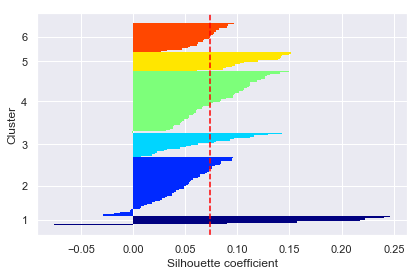

In [86]:
# create silhoutte plot
cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaled_data,
                                      labels,
                                      metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[labels == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(i) / n_clusters)
     plt.barh(range(y_ax_lower, y_ax_upper),
              c_silhouette_vals,
              height=1.0,
              edgecolor='none',
              color=color)
     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red",
             linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.show()
plt.savefig('silhoutte_plot_1.png')

In [40]:
kmeansSilhouette_Score = metrics.silhouette_score(data, labels, metric='euclidean')

In [41]:
print(kmeansSilhouette_Score)

0.06068683263262221


In [83]:
rand_index = adjusted_rand_score(labels_true = y, labels_pred = labels)
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.39


### Apply PCA to data before clustering

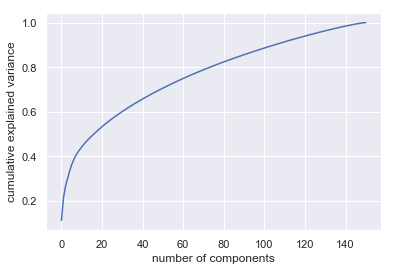

In [42]:
# In order to find the number of dimensions explaining most of the variety in the data, plot cumulative explained variance
pca_plot = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca_plot.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In order to explain 95% of data, one would need 100 principal components.

### Apply t-SNE

PCA didn´t seem to be a good approach as it would need 100 components to explain most of the data. Try t-SNE instead on original data.

In [43]:
tsne = TSNE(random_state=0)

In [44]:
tsne_result = tsne.fit_transform(data)

In [45]:
xi = tsne_result[:, 0]
yi = tsne_result[:, 1]

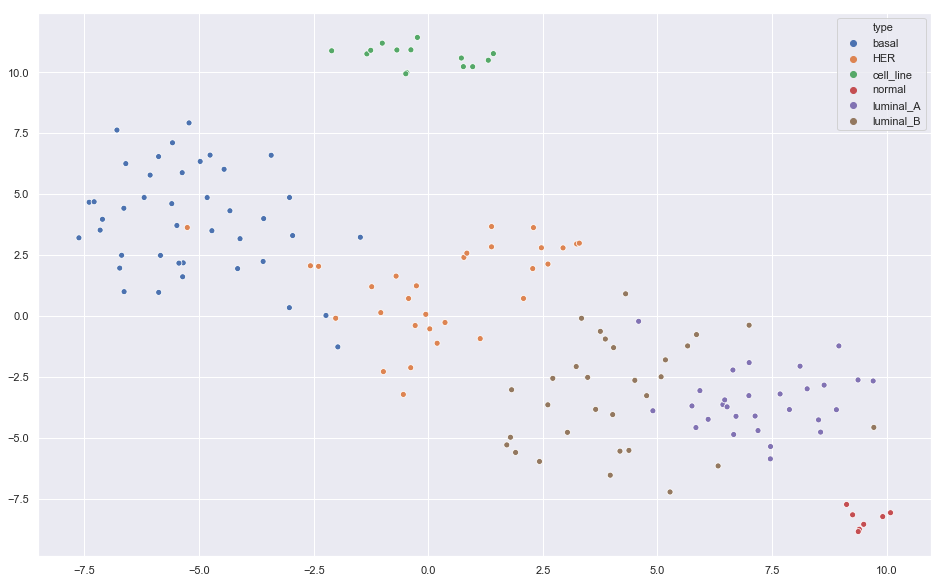

In [46]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=xi, y=yi,
    hue=y,
    legend="full",
    alpha=1
)
plt.savefig('t-SNE_plot.png')

Try t-SNE on scaled data.

In [47]:
tsne_scaled = TSNE(random_state=0)

In [48]:
tsne_result_scaled = tsne.fit_transform(scaled_data)

In [49]:
xi_scaled = tsne_result_scaled[:, 0]
yi_scaled = tsne_result_scaled[:, 1]

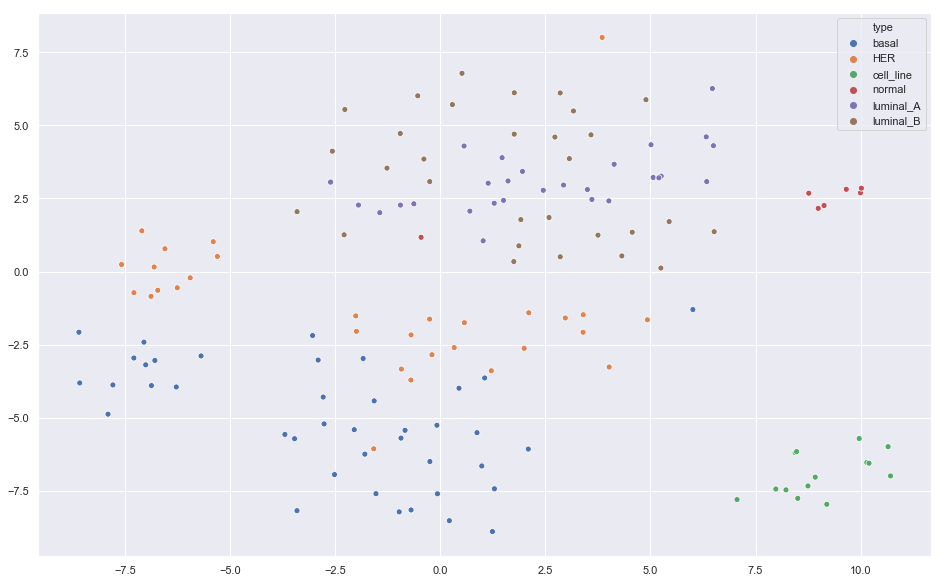

In [50]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=xi_scaled, y=yi_scaled,
    hue=y,
    legend="full",
    alpha=1
)

t-SNE does better on original data than on scaled data.

Run k-means algorithm on data after t-SNE with original data. t-SNE on scaled data visually doesn´t separate the clusters as well as with the original data.

In [51]:
km_tsne = KMeans(n_clusters = 6, random_state=0)

In [52]:
# predict the cluster labels
labels_tsne = km_tsne.fit_predict(tsne_result)

In [53]:
labels_tsne.size

151

In [54]:
labels_tsne

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 0, 4, 3, 4, 4, 4, 0, 4, 1, 4, 4, 4, 3, 4, 4, 3, 3],
      dtype=int32)

In [55]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels_tsne = pd.DataFrame(km_tsne.labels_ , columns = list(['label']))
df_labels_tsne['label'] = df_labels_tsne['label'].astype('category')
df_labels_tsne.head()

,label
0,2
1,2
2,2
3,2
4,2


In [56]:
df_labels_tsne['label'].value_counts()

2    38
1    34
3    30
4    22
5    14
0    13
Name: label, dtype: int64

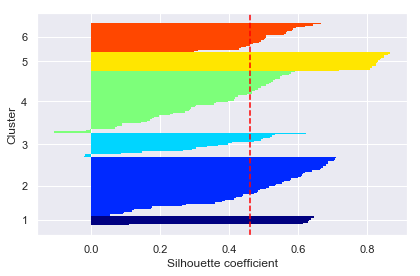

In [85]:
# silhouette plot
cluster_labels = np.unique(labels_tsne)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(tsne_result,
                                      labels_tsne,
                                      metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[labels == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(i) / n_clusters)
     plt.barh(range(y_ax_lower, y_ax_upper),
              c_silhouette_vals,
              height=1.0,
              edgecolor='none',
              color=color)
     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red",
             linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.show()
plt.savefig('silhoutte_plot_2.png')

In [58]:
kmeansSilhouette_Score = metrics.silhouette_score(tsne_result, labels_tsne, metric='euclidean')
kmeansSilhouette_Score

0.4613207

In [59]:
permutation = find_permutation(6, y, km_tsne.labels_)
print(permutation)

['normal', 'HER', 'basal', 'luminal_A', 'luminal_B', 'cell_line']


In [60]:
new_labels = [ permutation[label] for label in km_tsne.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.8675496688741722


This dataset has "ground truth" cell type labels available. We can use these to assess our cluster labels a bit more rigorously using the adjusted Rand index. This index is a measure between (0, 1) which indicates the similarity between two sets of categorical labels (e.g., our cell type labels and cluster labels). A value of 1 means the two clusterings are identical, and 0 means the level of similarity expected by random chance.

In [61]:
rand_index = adjusted_rand_score(labels_true = y, labels_pred = labels_tsne)
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.72


### UMAP

In [62]:
import umap
import numba.targets

/Applications/anaconda3/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [63]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(data)

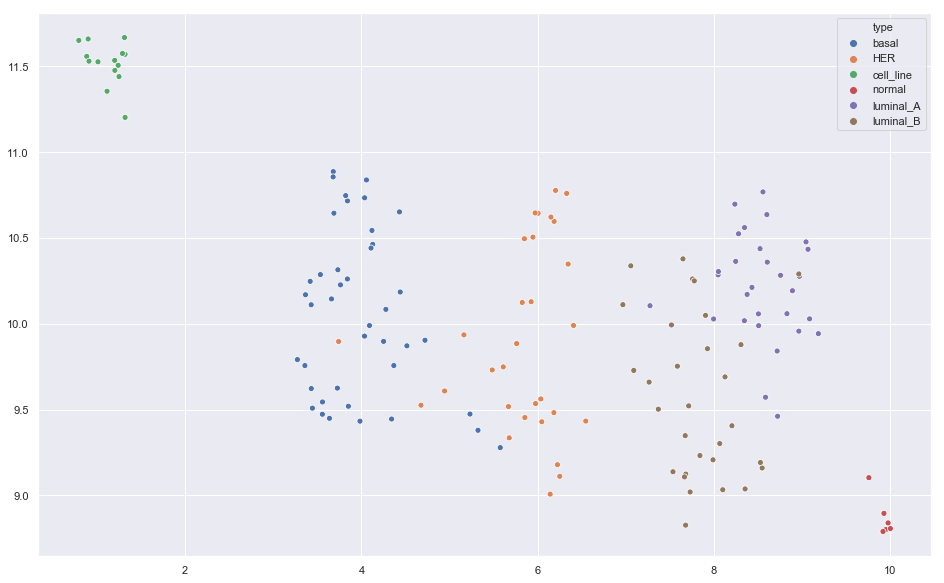

In [64]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=clusterable_embedding[:, 0], y=clusterable_embedding[:, 1],
    hue=y,
    legend="full",
    alpha=1
)
plt.savefig('UMAP_plot.png')

Perform k-means clustering after UMAP embedding

In [65]:
km_umap = KMeans(n_clusters = 6)

In [66]:
# predict the cluster labels
labels_umap = km_umap.fit_predict(clusterable_embedding)

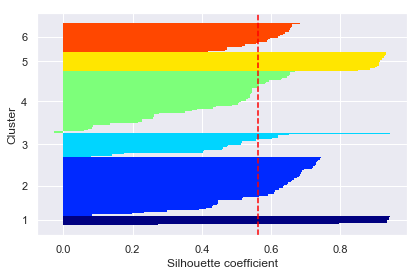

In [87]:
# silhouette plot
cluster_labels = np.unique(labels_umap)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(clusterable_embedding,
                                      labels_umap,
                                      metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[labels == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(i) / n_clusters)
     plt.barh(range(y_ax_lower, y_ax_upper),
              c_silhouette_vals,
              height=1.0,
              edgecolor='none',
              color=color)
     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red",
             linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.show()
plt.savefig('silhoutte_plot_3.png')

In [68]:
kmeansSilhouette_Score = metrics.silhouette_score(clusterable_embedding, labels_umap, metric='euclidean')
kmeansSilhouette_Score

0.56150967

In [69]:
permutation = find_permutation(6, y, km_umap.labels_)
print(permutation)

['cell_line', 'luminal_B', 'basal', 'luminal_A', 'HER', 'normal']


In [70]:
new_labels = [ permutation[label] for label in km_umap.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.9403973509933775


In [71]:
rand_index = adjusted_rand_score(labels_true = y, labels_pred = labels_umap)
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.85


### Hierarchical Clustering

Test hierarchical clustering

In [72]:
# Calculate the linkage: mergings
mergings = linkage(df.iloc[:,2:].values, method='complete', metric='euclidean')

In [73]:
samples=df['samples']

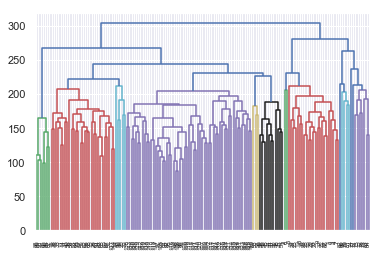

In [74]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           #labels=samples,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

This graphic is not giving any informative insights

#### Spectral Biclustering

In [75]:
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

In [76]:
rows=df.iloc[:,2:]

In [77]:
columns=df[df.columns[2:]]

In [78]:
n_clusters = (6,6)

In [79]:
model = SpectralBiclustering(n_clusters=n_clusters, method='bistochastic',
                             random_state=0)

In [80]:
model.fit(data)

SpectralBiclustering(n_clusters=(6, 6), random_state=0)

How to evaluate spectral biclustering?

Trial to plot heatmap

In [81]:
from bioinfokit import analys, visuz

In [82]:
#visuz.gene_exp.hmap(df=df.iloc[:,2:], dim=(3, 6), tickfont=(6, 4))

This is computational expensive. 